In [6]:
import sys,os
os.environ["JAX_ENABLE_X64"] = "true"
os.environ["JAX_PLATFORMS"] = "cpu"
from dadapy.hamming import * 
from dadapy import data


import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

rcpsize = 20
plt.rcParams['xtick.labelsize']= rcpsize
plt.rcParams['ytick.labelsize']=rcpsize
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = rcpsize
plt.rcParams.update({'figure.autolayout': True})
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['ggplot']['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['seaborn-v0_8']['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['seaborn-v0_8-dark-palette']['axes.prop_cycle'].by_key()['color']
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
# print(plt.rcParams.keys())
#np.set_printoptions(precision=None)
markers = ['p','o','h','^','s']
plot_id = 0

images.shape=(60000, 784)


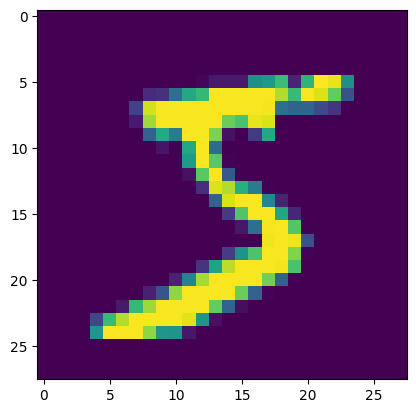

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
# Define transformation to convert images to tensor
fig,ax = plt.subplots(1)

fixed_number = 1
take_all = 1
# Load MNIST test set
set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Filter the dataset to only keep images of the digit '7'
images = []
labels = []

for image, label in set:
  if label == fixed_number or take_all:  # Filter out only the digit '7'
    images.append(image.numpy().flatten())  # Flatten the image and add to the list
    labels.append(label)  # Add the label (which will be 7) to the list

images = np.array(images) # Shape: (num_samples, 784)
labels = np.array(labels)  # Shape: (num_samples,)
print(f'{images.shape=}')
ax.imshow(images[0].reshape((28,28)))
plt.show()

In [3]:
Ns_max = 8000
step = 1000
Ns_list = np.arange(4000,Ns_max+1,step,dtype=int)
Ns_list

array([4000, 5000, 6000, 7000, 8000])

In [4]:
deltas = np.zeros(shape=(2,len(Ns_list),))
stds = np.zeros(shape=(2,len(Ns_list),))
ds = np.zeros(shape=(2,))
ps = np.zeros(shape=(2,2))

for Nbits_id,Nbits in enumerate([0,1]):
  for Ns_id,Ns in enumerate(Ns_list):
    print(f'{Ns=}')
    X = images[:Ns]
    if Nbits == 1:
      X = np.unique(2*np.sign(X)-1,axis=0)
    # X = np.random.normal(loc=0,scale=1,size=(Ns,15))
    _data = data.Data(coordinates=X, maxk=X.shape[0]-1)
    _data.compute_distances()
    deltas[Nbits_id,Ns_id] = np.mean(_data.distances[:,1])
    stds[Nbits_id,Ns_id] = np.std(_data.distances[:,1])
    del _data,X
  ps[Nbits_id],cov = np.polyfit(np.log(Ns_list),np.log(deltas[Nbits_id,:]),deg=1,cov=True)
  ds[Nbits_id] = -1/ps[Nbits_id,0]

Ns=4000
Ns=5000
Ns=6000
Ns=7000
Ns=8000
Ns=4000
Ns=5000
Ns=6000
Ns=7000
Ns=8000


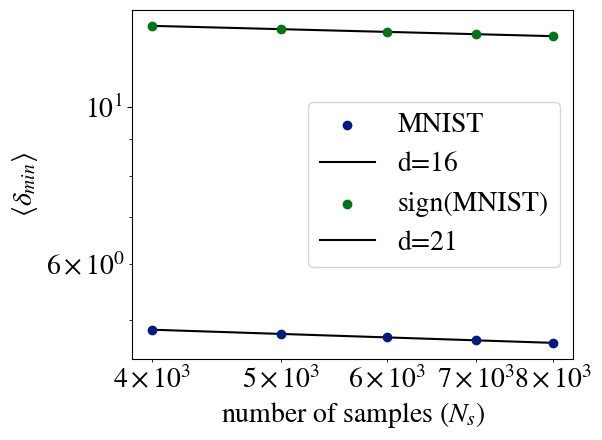

In [11]:
fig,ax = plt.subplots(1)
for Nbits_id,Nbits in enumerate([0,1]):
  lbl = 'MNIST'
  if Nbits == 1:
    lbl = 'sign(MNIST)'
  ax.scatter(Ns_list,
        deltas[Nbits_id,:],
        marker='o',
        label=lbl,
        )
  ax.plot(Ns_list,
          np.exp(ps[Nbits_id,1])*Ns_list**(ps[Nbits_id,0]),
          color='black',
          zorder=0,
          label=f'd={ds[Nbits_id]:.0f}')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_ylabel(r'$\langle \delta_{min} \rangle$')
ax.set_xlabel('number of samples ' + r'$(N_s)$')
plt.show()